# Lab Session 2

In [2]:
%matplotlib inline
import statsmodels as sm
import pandas as pd

In [3]:
#dataset on extra marital affairs. see: https://www.statsmodels.org/dev/datasets/generated/fair.html
data = sm.datasets.get_rdataset('Fair', 'Ecdat')
#nb: this will only work if you have an internet connection!
#if it doesn't, uncomment and run the following code (you will have to comment out the line above)
import pickle
data = pickle.load(open('Fair.p', 'rb'))
df = pd.DataFrame(data.data)

Let’s start by looking at the relationship between gender and other variables in the dataset
- Let’s get group means first: `df['education'].groupby(df['sex']).mean()` 

In [4]:
df['education'].groupby(df['sex']).mean()

sex
female    15.257143
male      17.167832
Name: education, dtype: float64

Now make a boxplot for the variable education, grouped by sex. You can use: `df.boxplot('education', by='sex', figsize=(5,5))`
- What interpretation do you arrive at from the group means? Does the boxplot support the conclusion?


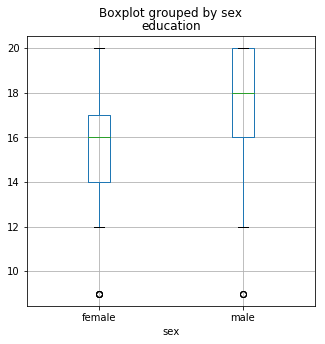

In [5]:
df.boxplot('education', by='sex', figsize=(5,5))



Repeat the procedure for the ‘number of affairs’ variable. What conclusion do you reach here?

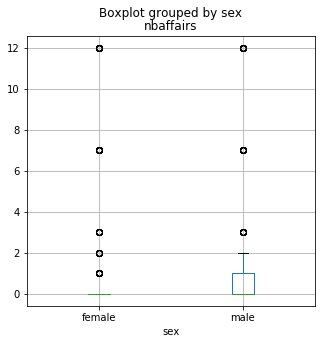

In [6]:
df.boxplot('nbaffairs', by='sex', figsize=(5,5))



One reason it’s a bit hard to interpret is because most people haven’t had any affairs. In this kind of situation it would be quite common to convert the variable into a categorical one which simply records whether people have or have not had an affair. Let’s look at how to do this.

First, input the following piece of code into a code cell and hit run:
- `df['nbaffairs'] > 0`
- You’ll see a long list of `True` / `False` values as output (and in fact we find out that the dataset seems to be ordered by the number of affairs, though this isn’t something that makes a difference). This is a new variable which has the value `True` every time `df['nbaffairs']` is greater than 0. This is a type of categorical variable which is sometimes known as a boolean.

In [7]:
df['nbaffairs'] > 0

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
571     True
572     True
573     True
574     True
575     True
576     True
577     True
578     True
579     True
580     True
581     True
582     True
583     True
584     True
585     True
586     True
587     True
588     True
589     True
590     True
591     True
592     True
593     True
594     True
595     True
596     True
597     True
598     True
599     True
600     True
Name: nbaffairs, Length: 601, dtype: bool

- Let’s capture this variable in our dataframe. We can do this with: `df['had_affair'] = df['nbaffairs'] > 0` 
- Reinspect the dataframe using the `.head()` command. You should see a new variable in there. Use `.value_counts()` to find out how many people in the dataset had an affair. Check the first lab if you can't remember how to use these commands. Remember you can insert new code cells in the menu bar above if you want to split these commands into multiple cells. 

In [8]:
df['had_affair'] = df['nbaffairs'] > 0

Let’s now make a cross tab with our new variable and the sex variable. We can do this using: `pd.crosstab(df['had_affair'], df['sex'])`

It’s also interesting to look at the percentages in each category: `pd.crosstab(df['had_affair'], df['sex'], normalize='columns')`

In [14]:
pd.crosstab(df['had_affair'], df['sex'])

sex,female,male
had_affair,,
False,243,208
True,72,78


And of course to make a barplot – note we can do it directly rather than capturing the output from the first step

`pd.crosstab(df['had_affair'], df['sex'], normalize='columns').plot.bar()`

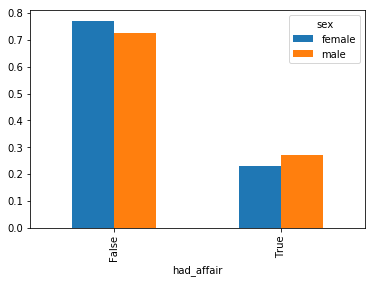

In [15]:
pd.crosstab(df['had_affair'], df['sex'], normalize='columns').plot.bar()

Try the same commands with the had_affair variable and the rate variable. What other type of graphic could we use to investigate this relation?

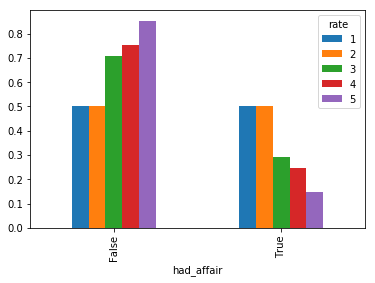

In [16]:
pd.crosstab(df['had_affair'], df['rate'], normalize='columns').plot.bar()

Finally let’s look at how to make scatter plots and correlations

The correlation between age and years married is given by: `df['age'].corr(df['ym'])`

And the scatter plot is given by: `df.plot.scatter('age', 'ym')`


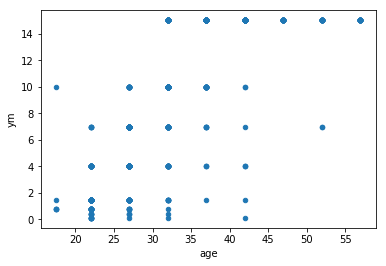

In [17]:
df['age'].corr(df['ym'])

df.plot.scatter('age', 'ym')

The correlation isn’t that evident in the graphic even though the results of using `.corr()` suggest a strong correlation. Part of the reason for this is again that ym has only a few possible values. Hence it’s difficult to tell the difference between a point on the graphic which has lots of data on it and a point which just has one data point. 

We can fix this by applying some transparency to the points (commonly referred to as alpha): `df.plot.scatter('age', 'ym', alpha=0.05)`

Alpha is a value from 0 to 1. With alpha of 0.05, 20 points have to be plotted on each other to make a fully coloured point


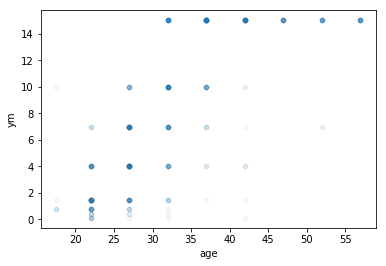

In [18]:
df.plot.scatter('age', 'ym', alpha=0.05)

Theoretically before any analysis we want to investigate all possible correlations between variables. We can use some shorthand notation to do them all at once:

`df.corr()` will give us correlations for all possible pairs of numeric variables.

We can also use the same true / false operation to quickly identify, say, correlations above 0.75 `df.corr() > 0.75`

In [21]:
df.corr() > 0.75

,age,ym,religious,education,occupation,rate,nbaffairs,had_affair
age,True,True,False,False,False,False,False,False
ym,True,True,False,False,False,False,False,False
religious,False,False,True,False,False,False,False,False
education,False,False,False,True,False,False,False,False
occupation,False,False,False,False,True,False,False,False
rate,False,False,False,False,False,True,False,False
nbaffairs,False,False,False,False,False,False,True,True
had_affair,False,False,False,False,False,False,True,True


You might have noticed in the above that the two categorical variables (gender and children) are missing. However our categorical 'had_affair' variable is present. If we structure variables as booleans then `df.corr()` will make use of them, effectively calculating the difference in means between groups. 

Let's convert the gender variable to a boolean. We can do this with: `df['is_male'] = df['sex'] == 'male'`

Note the difference between `=` and `==`: one is for assignment, and one checks equality. Don't worry if you aren't sure about some of the Python syntax: your intensive Python courses are going to swing into gear soon!

Run `df.corr()` again - you should now see the column `'is_male'` included. 

Repeat the procedure for the children variable. 

In [22]:
df['is_male'] = df['sex'] == 'male'

In [23]:
df.corr()

,age,ym,religious,education,occupation,rate,nbaffairs,had_affair,is_male
age,1.000000,0.777546,0.193777,0.134596,0.166413,-0.199000,0.095237,0.057322,0.190641
ym,0.777546,1.000000,0.218261,0.040003,0.044592,-0.243119,0.186842,0.140301,0.030283
religious,0.193777,0.218261,1.000000,-0.042571,-0.039722,0.024296,-0.144501,-0.130090,0.007679
education,0.134596,0.040003,-0.042571,1.000000,0.533605,0.109303,-0.002437,0.019286,0.397505
occupation,0.166413,0.044592,-0.039722,0.533605,1.000000,0.017422,0.049612,0.037642,0.467923
rate,-0.199000,-0.243119,0.024296,0.109303,0.017422,1.000000,-0.279512,-0.253814,-0.007524
nbaffairs,0.095237,0.186842,-0.144501,-0.002437,0.049612,-0.279512,1.000000,0.765927,0.011736
had_affair,0.057322,0.140301,-0.130090,0.019286,0.037642,-0.253814,0.765927,1.000000,0.050956
is_male,0.190641,0.030283,0.007679,0.397505,0.467923,-0.007524,0.011736,0.050956,1.000000


Now you have a good idea of all the different ways you can describe a dataset, and start to learn about its properties. So, let's apply this knowledge to a new dataset! There is another embedded dataset called the RAND health experiment data, which you can load with: 

`df = sm.datasets.cpunish.load_pandas().data`. Documentation can be found here: https://www.statsmodels.org/dev/datasets/generated/cpunish.html Describe the dataset, and look out for unusual or noteworthy patterns or correlations in the data. Complete this at home if you run out of time in class.